In [2]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd
import matplotlib.pyplot as plt


def classify_sentiment_vader(comment, analyzer):
    # Get the sentiment score using VADER
    sentiment_score = analyzer.polarity_scores(str(comment))['compound']
    
    # Classify the sentiment based on the score
    if sentiment_score > 0.05:
        return 'Positive'
    elif sentiment_score < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

def classify_comments_vader(csv_path):
    df = pd.read_csv(csv_path)

    analyzer = SentimentIntensityAnalyzer()
    sentiments = []

    for i, row in df.iterrows():
        sentiment = classify_sentiment_vader(row['cleaned_comment'], analyzer)
        sentiments.append(sentiment)

        if i % 10000 == 0 and i > 0: # type: ignore
            print(f"Clasificados {i} comentarios...")

    df['sentiment_Vader'] = sentiments
    df.to_csv('../data/comments_with_sentiment.csv', index=False)
    print("Los comentarios con clasificación de sentimiento VADER han sido guardados.")
    
    return df

# Classify comments using VADER sentiment analysis
classified_comments_vader = classify_comments_vader('../data/cleaned_comments.csv')


Clasificados 10000 comentarios...
Los comentarios con clasificación de sentimiento VADER han sido guardados.


<Axes: >

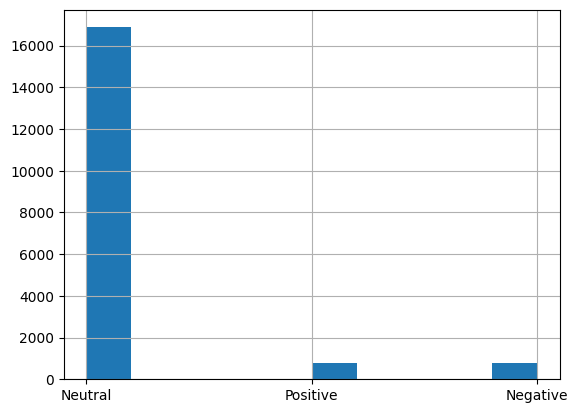

In [3]:
classified_comments_vader['sentiment_Vader'].hist()